# **Handwritten Digit Recognition**
**MNIST Dataset**

In [1]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K
from keras.preprocessing import image
from keras.applications.mobilenet import MobileNet
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.models import Model
import timeit
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

In [16]:
batch_size = 64
num_classes = 10
epochs = 45

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


Model Creation

In [17]:
model = Sequential()
model.add(Conv2D(8, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 8)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 16)        1168      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 5, 5, 16)          0         
                                                                 
 flatten_1 (Flatten)         (None, 400)              

Training

In [18]:
from tensorflow import keras
from tensorflow.keras import layers

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/45
938/938 [==============================] - 23s 24ms/step - loss: 0.7019 - accuracy: 0.7689 - val_loss: 0.1363 - val_accuracy: 0.9614
Epoch 2/45
938/938 [==============================] - 22s 23ms/step - loss: 0.3521 - accuracy: 0.8873 - val_loss: 0.1032 - val_accuracy: 0.9683
Epoch 3/45
938/938 [==============================] - 23s 24ms/step - loss: 0.2916 - accuracy: 0.9073 - val_loss: 0.0842 - val_accuracy: 0.9734
Epoch 4/45
938/938 [==============================] - 22s 23ms/step - loss: 0.2639 - accuracy: 0.9168 - val_loss: 0.0727 - val_accuracy: 0.9772
Epoch 5/45
938/938 [==============================] - 22s 24ms/step - loss: 0.2409 - accuracy: 0.9242 - val_loss: 0.0662 - val_accuracy: 0.9788
Epoch 6/45
938/938 [==============================] - 22s 24ms/step - loss: 0.2267 - accuracy: 0.9274 - val_loss: 0.0626 - val_accuracy: 0.9792
Epoch 7/45
938/938 [==============================] - 22s 24ms/step - loss: 0.2135 - accuracy: 0.9324 - val_loss: 0.0581 - val_accuracy:

Testing

In [19]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.03236875310540199
Test accuracy: 0.9879999756813049


Prediction

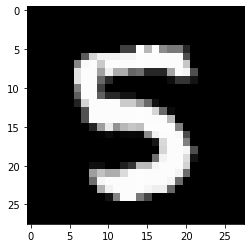

In [22]:
import pylab as plt

plt.imshow(x_test[120].reshape(28,28),cmap='gray')
plt.show()

In [25]:
import numpy as np
prediction = model.predict(x_test[120:121])
print('Prediction Score:\n',prediction[0])
thresholded = (prediction>0.5)*1
print('\nThresholded Score:\n',thresholded[0])
print('\nPredicted Digit:\n',np.where(thresholded == 1)[1][0])

Prediction Score:
 [1.1024424e-17 1.0801275e-14 1.6684959e-13 6.5431800e-06 8.0675348e-14
 9.9999118e-01 1.2788241e-13 1.5723784e-12 3.4587583e-07 1.8841841e-06]

Thresholded Score:
 [0 0 0 0 0 1 0 0 0 0]

Predicted Digit:
 5
